# Table of Contents
   1. Business Statement   
      1.1 About Data Set
   2. Introduction 
   3. Installing Libraries 
   4. Reading Data Set
   5. Pre-Profilling and Processing
   6. EDA
   7. Machine Learning Models 
   8. Summary

# Business Statement 

In [18]:
#About Business Problem 

# About Data Set

## Spaceship Titanic
Dataset Shape: 12790 rows x 15 columns

1. **PassengerId** - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.
2. **HomePlanet** - The planet the passenger departed from, typically their planet of permanent residence.

3. **CryoSleep** - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.

4. **Cabin** - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.

5. **Destination** - The planet the passenger will be debarking to.

6. **Age** - The age of the passenger.

7. **VIP**- Whether the passenger has paid for special VIP service during the voyage.

8. **RoomService** - Amount the passenger has billed at each of the Spaceship Titanic's room service amenities.

9. **FoodCourt** - Amount the passenger has billed at each of the Spaceship Titanic's foodcourt amenities.

10. **ShoppingMall** - Amount the passenger has billed at each of the Spaceship Titanic's shopping mall amenities.

11. **Spa** - Amount the passenger has billed at each of the Spaceship Titanic's spa amenities.

12. **VRDeck** - Amount the passenger has billed at each of the Spaceship Titanic's vrdeck amenities.

13. **Name** - The first and last names of the passenger.

14. **Transported** - Whether the passenger was transported to another dimension. 

# Introduction

In [19]:
#2-3 paragraph about data set

**Important**
1. The following code runs on GPU. Make sure the code runs on GPU, if not it will not execute.
2. Dependencies have been installed and imported on the cloud notebook, but the other person might working on local machine/ cloud notebook needs to re-install them, I have written line installing all dependencies. 
3. Pls change the path of the dataset. It is connected to my drive, so it will not work on others machine.

# Importing Important Dependencies 

In [20]:
!pip install yellowbrick catboost lightgbm xgboost

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random as rnd

In [22]:
#from google.colab import drive
#drive.mount('/content/drive')

# Reading Data Set

In [23]:
df = pd.read_csv('MY2022 Fuel Consumption Ratings.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'MY2022 Fuel Consumption Ratings.csv'

In [ ]:
df.head(10)

# Pre-Profiling and Pre-Processing

Since there are some unwanted columns, we will remove them 

In [ ]:
df = df.drop(columns = 'Unnamed: 0', axis = 1)
df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12965,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter,NaN
12966,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron,NaN
12967,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore,NaN
12968,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale,NaN


Gathering information about the data set using info() on it such that, if there are some challenges with the data set, that can be removed in the further discussion.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12970 entries, 0 to 12969
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   12970 non-null  object 
 1   HomePlanet    12682 non-null  object 
 2   CryoSleep     12660 non-null  object 
 3   Cabin         12671 non-null  object 
 4   Destination   12696 non-null  object 
 5   Age           12700 non-null  float64
 6   VIP           12674 non-null  object 
 7   RoomService   12707 non-null  float64
 8   FoodCourt     12681 non-null  float64
 9   ShoppingMall  12664 non-null  float64
 10  Spa           12686 non-null  float64
 11  VRDeck        12702 non-null  float64
 12  Name          12676 non-null  object 
 13  Transported   8693 non-null   object 
dtypes: float64(6), object(8)
memory usage: 1.4+ MB


In [ ]:
sum(df.duplicated())

0

In [ ]:
df.isnull().sum()

PassengerId        0
HomePlanet       288
CryoSleep        310
Cabin            299
Destination      274
Age              270
VIP              296
RoomService      263
FoodCourt        289
ShoppingMall     306
Spa              284
VRDeck           268
Name             294
Transported     4277
dtype: int64

In [ ]:
df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,12700.000000,12707.000000,12681.000000,12664.000000,12686.000000,12702.000000
mean,28.771969,222.897852,451.961675,174.906033,308.476904,306.789482
std,14.387261,647.596664,1584.370747,590.558690,1130.279641,1180.097223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,49.000000,77.000000,29.000000,57.000000,42.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


# EDA

In [ ]:
sns.set_theme(style = "darkgrid")

# Q.1 What is the distribution of the outcome variable?

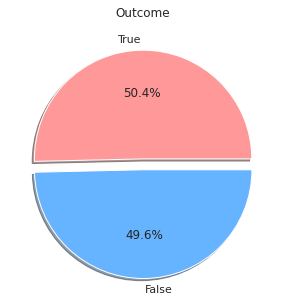

In [ ]:
fig, ax = plt.subplots(figsize = (10, 5))
df["Transported"].value_counts().plot.pie(explode = [0, 0.1], autopct = "%1.1f%%", colors = ['#ff9999','#66b3ff'], shadow = True)
ax.set_title("Outcome")
ax.set_ylabel('')
plt.show()

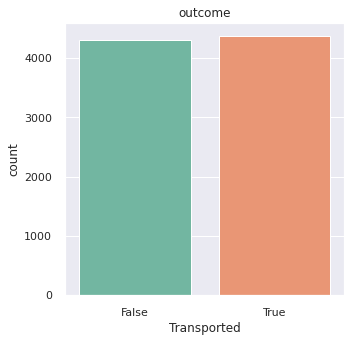

In [ ]:
fig, ax = plt.subplots(figsize = (5, 5))
sns.countplot("Transported", data = df, palette = "Set2")
ax.set_title("outcome")
plt.show()

# Q.2 Are the variabels properly correlated 

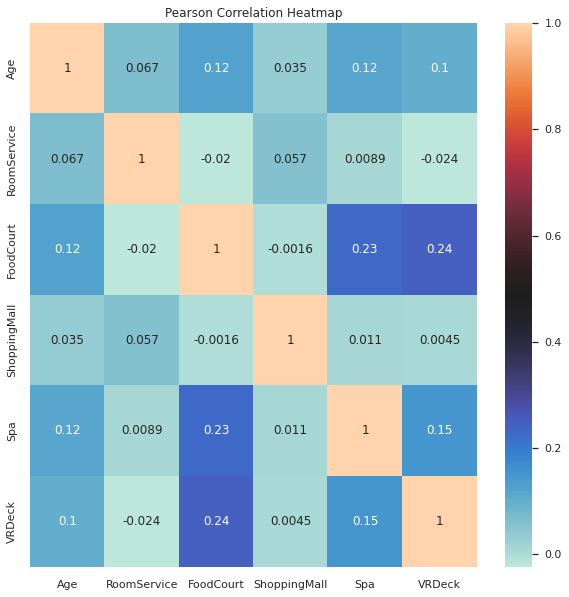

In [ ]:
fig, ax = plt.subplots(figsize = (10, 10))
plt.title("Pearson Correlation Heatmap")
sns.heatmap(df.corr(method = 'pearson'), annot = True, cmap = 'icefire')
plt.show()

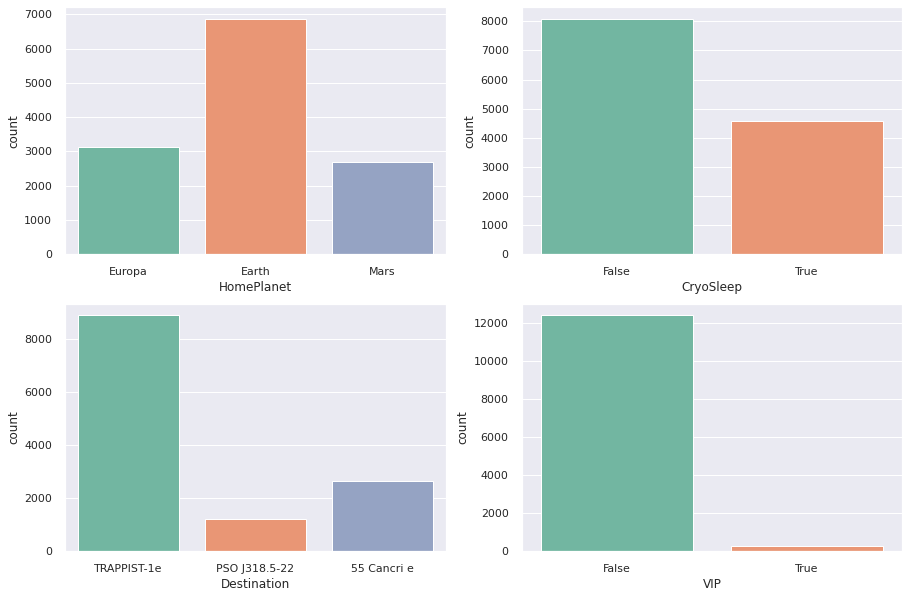

In [ ]:
fig,ax = plt.subplots(2,2, figsize=(15,10))
sns.countplot(df['HomePlanet'], palette = 'Set2', ax = ax[0][0])
sns.countplot(df['CryoSleep'], palette = 'Set2', ax = ax[0][1])
sns.countplot(df['Destination'], palette = 'Set2', ax = ax[1][0])
sns.countplot(df['VIP'], palette = 'Set2', ax = ax[1][1])
plt.show()

In [ ]:
dss = df.dropna(axis = 0)
dss

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [ ]:
dss.isnull().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
Transported     0
dtype: int64

In [ ]:
dss[['Deck', "Num", 'Side']] = dss['Cabin'].str.split("/", expand = True)
dss['Total'] = dss[['RoomService', "FoodCourt", 'ShoppingMall', "Spa", "VRDeck"]].sum(axis = 1)
dss.drop(['Cabin', 'RoomService', "FoodCourt", 'ShoppingMall', "Spa", "VRDeck", "Name", "PassengerId"], axis = 1, inplace = True)
dss

,HomePlanet,CryoSleep,Destination,Age,VIP,Transported,Deck,Num,Side,Total
0,Europa,False,TRAPPIST-1e,39.0,False,False,B,0,P,0.0
1,Earth,False,TRAPPIST-1e,24.0,False,True,F,0,S,736.0
2,Europa,False,TRAPPIST-1e,58.0,True,False,A,0,S,10383.0
3,Europa,False,TRAPPIST-1e,33.0,False,False,A,0,S,5176.0
4,Earth,False,TRAPPIST-1e,16.0,False,True,F,1,S,1091.0
...,...,...,...,...,...,...,...,...,...,...
8688,Europa,False,55 Cancri e,41.0,True,False,A,98,P,8536.0
8689,Earth,True,PSO J318.5-22,18.0,False,False,G,1499,S,0.0
8690,Earth,False,TRAPPIST-1e,26.0,False,True,G,1500,S,1873.0
8691,Europa,False,55 Cancri e,32.0,False,False,E,608,S,4637.0


In [ ]:
dss['CryoSleep'] = dss['CryoSleep'].astype(int)
dss['VIP'] = dss['VIP'].astype(int)
dss

,HomePlanet,CryoSleep,Destination,Age,VIP,Transported,Deck,Num,Side,Total
0,Europa,0,TRAPPIST-1e,39.0,0,False,B,0,P,0.0
1,Earth,0,TRAPPIST-1e,24.0,0,True,F,0,S,736.0
2,Europa,0,TRAPPIST-1e,58.0,1,False,A,0,S,10383.0
3,Europa,0,TRAPPIST-1e,33.0,0,False,A,0,S,5176.0
4,Earth,0,TRAPPIST-1e,16.0,0,True,F,1,S,1091.0
...,...,...,...,...,...,...,...,...,...,...
8688,Europa,0,55 Cancri e,41.0,1,False,A,98,P,8536.0
8689,Earth,1,PSO J318.5-22,18.0,0,False,G,1499,S,0.0
8690,Earth,0,TRAPPIST-1e,26.0,0,True,G,1500,S,1873.0
8691,Europa,0,55 Cancri e,32.0,0,False,E,608,S,4637.0


In [ ]:
X = dss.drop('Transported', axis = 1)
y = dss.Transported

In [ ]:
cat_cols = ['HomePlanet', 'Destination', 'Deck', 'Side']
cont_cols = ['Age', 'Num', 'Total']

# Machine Learning Models:

1. Logistic Regression
2. Decision Tree
3. Gaussian Naive Bayes
4. Random Forest
5. K-Nearest Neighbors
6. Support Vector Machine
7. Stochastic Gradient Descent
8. AdaBoost
9. Extreme Gradient Boosting
10. Light Gradient Boosting Machine
11. CatBoost

# Metrics used: Classification Report, Confusion Matrix, ROCAUC Curve, Precision-Recall Curve

First we will split the data into test and training set, such that we can first train the data using a model and for further evaluation we can use test data to check the above mentioned metircs on the data set.

In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split as tts
from sklearn.compose import make_column_transformer

In [ ]:
X_train, X_test, y_train, y_test = tts(X, y, test_size = .3, random_state = 2022)

In [ ]:
transformer = make_column_transformer((OneHotEncoder(), cat_cols),(StandardScaler(), cont_cols), remainder = 'passthrough')

In [ ]:
#TO split data 
X_train = transformer.fit_transform(X_train)
X_test = transformer.transform(X_test)

In [ ]:
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

In [ ]:
colors= ["YlGnBu", "Blues", "BuPu", "Greens", "PiYG"]
rnd.choice(colors)

'Greens'

In [17]:
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from yellowbrick.contrib.wrapper import wrap
from yellowbrick.classifier import ClassificationReport, ConfusionMatrix, ROCAUC, PrecisionRecallCurve
import warnings
warnings.filterwarnings("ignore")

# Logistic Regression

In [ ]:
#Created an obj for logistic regression 
log_reg = LogisticRegression(random_state = 10)
log_reg.fit(X_train, y_train)

LogisticRegression(random_state=10)

In [ ]:
#Training Accuracy
log_reg.score(X_train, y_train)

0.7236159169550173

In [ ]:
#Evalution of Model
y_pred = log_reg.predict(X_test)
accuracy_score(y_test, y_pred) 

0.7346115035317861

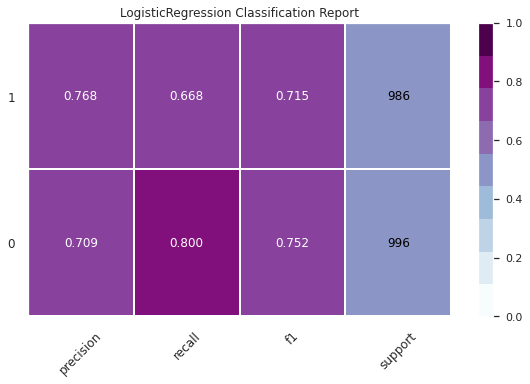

In [ ]:
visualizer = ClassificationReport(log_reg, support = True, color_bar = True, cmap = rnd.choice(colors))
visualizer.fit(X_train, y_train)        
visualizer.score(X_test, y_test)   
visualizer.show()  

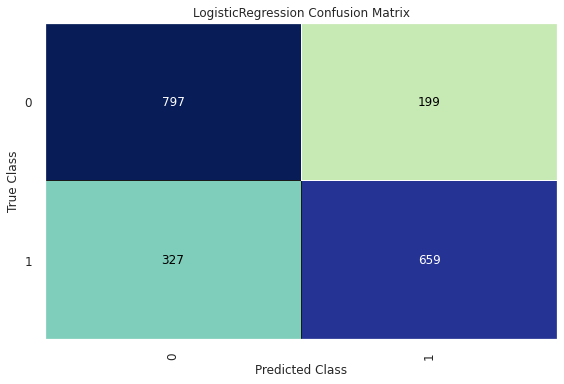

In [ ]:
visualizer = ConfusionMatrix(log_reg, support = True, color_bar = True, cmap = rnd.choice(colors))
visualizer.fit(X_train, y_train)        
visualizer.score(X_test, y_test)   
visualizer.show() 

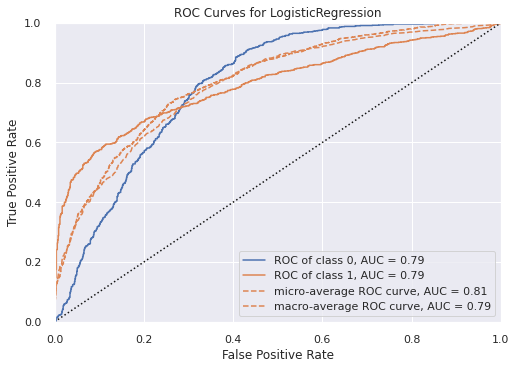

In [ ]:
visualizer = ROCAUC(log_reg, support = True, color_bar = True, cmap = rnd.choice(colors))
visualizer.fit(X_train, y_train)        
visualizer.score(X_test, y_test)   
visualizer.show() 

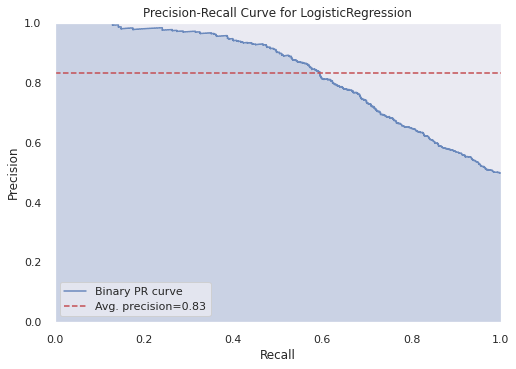

In [ ]:
visualizer = PrecisionRecallCurve(log_reg, support = True, color_bar = True, cmap = rnd.choice(colors))
visualizer.fit(X_train, y_train)        
visualizer.score(X_test, y_test)   
visualizer.show() 

# Decision Tree

In [ ]:
#Created an obj for Decision Tree 
dec_tree = DecisionTreeClassifier(max_depth = 25, min_samples_split = 5, random_state = 10)
dec_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=25, min_samples_split=5, random_state=10)

In [ ]:
#Training Accuracy
dec_tree.score(X_train, y_train)

0.9506920415224913

In [ ]:
#Evalution of Model
y_pred = dec_tree.predict(X_test)
accuracy_score(y_test, y_pred)

0.6907164480322906

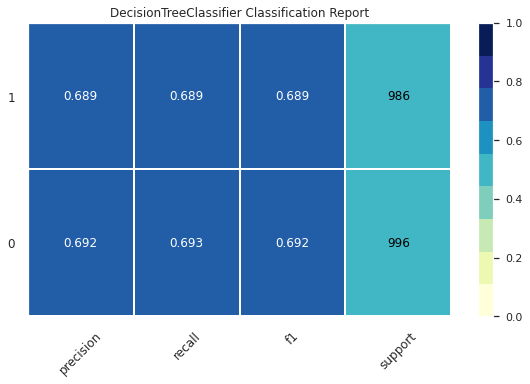

In [ ]:
visualizer = ClassificationReport(dec_tree, support = True, color_bar = True, cmap = rnd.choice(colors))
visualizer.fit(X_train, y_train)        
visualizer.score(X_test, y_test)   
visualizer.show()  

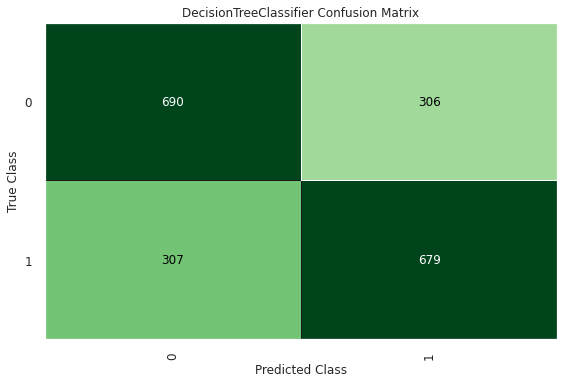

In [ ]:
visualizer = ConfusionMatrix(dec_tree, support = True, color_bar = True, cmap = rnd.choice(colors))
visualizer.fit(X_train, y_train)        
visualizer.score(X_test, y_test)   
visualizer.show()  

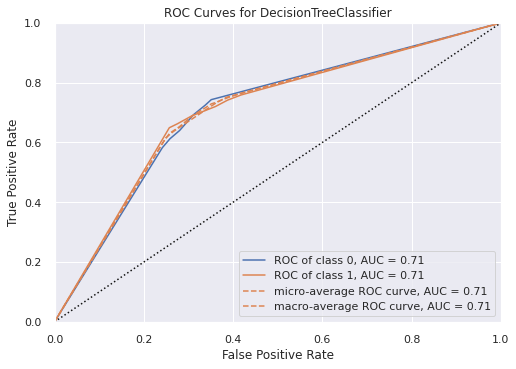

In [ ]:
visualizer = ROCAUC(dec_tree, support = True, color_bar = True, cmap = rnd.choice(colors))
visualizer.fit(X_train, y_train)        
visualizer.score(X_test, y_test)   
visualizer.show()  

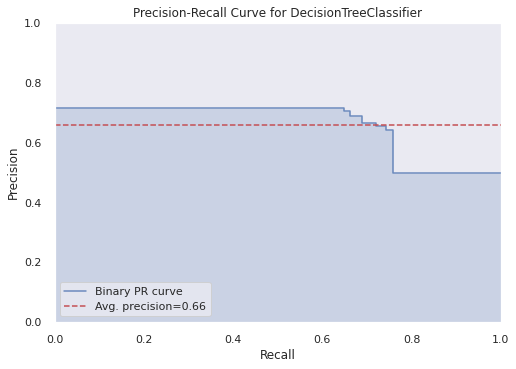

In [ ]:
visualizer = PrecisionRecallCurve(dec_tree, support = True, color_bar = True, cmap = rnd.choice(colors))
visualizer.fit(X_train, y_train)        
visualizer.score(X_test, y_test)   
visualizer.show()  

# Gaussian Naive Bayes

In [ ]:
#Created an obj for Gaussian Naive Bayes
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [ ]:
#Training Accuracy
gnb.score(X_train, y_train)

0.5157871972318339

In [ ]:
#Evalution of Model
y_pred = gnb.predict(X_test)
test_acc = accuracy_score(y_test, y_pred)

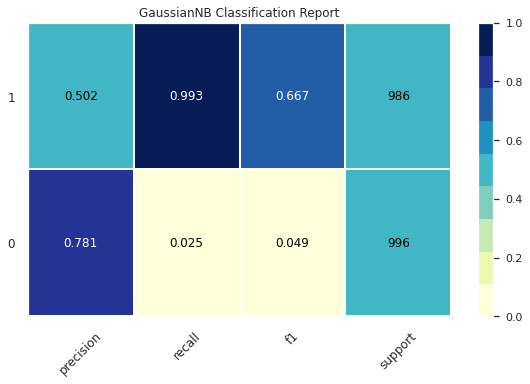

In [ ]:
visualizer = ClassificationReport(gnb, support = True, color_bar = True, cmap = rnd.choice(colors))
visualizer.fit(X_train, y_train)        
visualizer.score(X_test, y_test)   
visualizer.show()  

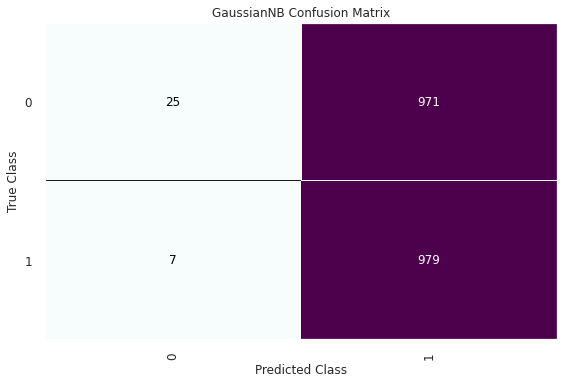

In [ ]:
visualizer = ConfusionMatrix(gnb, support = True, color_bar = True, cmap = rnd.choice(colors))
visualizer.fit(X_train, y_train)        
visualizer.score(X_test, y_test)   
visualizer.show()  

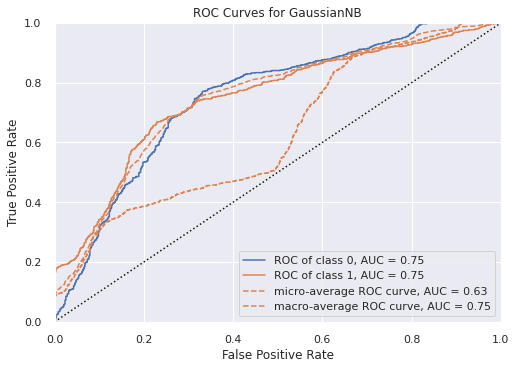

In [ ]:
visualizer = ROCAUC(gnb, support = True, color_bar = True, cmap = rnd.choice(colors))
visualizer.fit(X_train, y_train)        
visualizer.score(X_test, y_test)   
visualizer.show()  

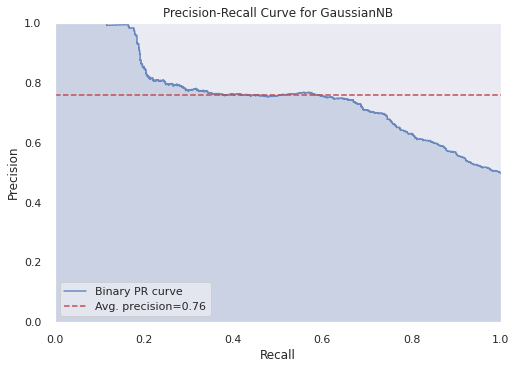

In [ ]:
visualizer = PrecisionRecallCurve(gnb, support = True, color_bar = True, cmap = rnd.choice(colors))
visualizer.fit(X_train, y_train)        
visualizer.score(X_test, y_test)   
visualizer.show()  

# Random Forest

In [ ]:
#Created an obj for Random Forest
rand_for = RandomForestClassifier(n_jobs = None, max_depth = 25, min_samples_split = 5, random_state = 10, n_estimators= 200)
rand_for.fit(X_train, y_train)

RandomForestClassifier(max_depth=25, min_samples_split=5, n_estimators=200,
                       random_state=10)

In [ ]:
#Training Accuracy
rand_for.score(X_train, y_train)

0.965181660899654

In [ ]:
#Evalution of Model
y_pred = rand_for.predict(X_test)
accuracy_score(y_test, y_pred) 

0.7532795156407669

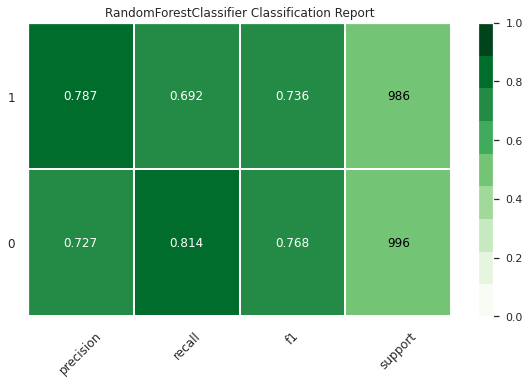

In [ ]:
visualizer = ClassificationReport(rand_for, support = True, color_bar = True, cmap = rnd.choice(colors))
visualizer.fit(X_train, y_train)        
visualizer.score(X_test, y_test)   
visualizer.show()  

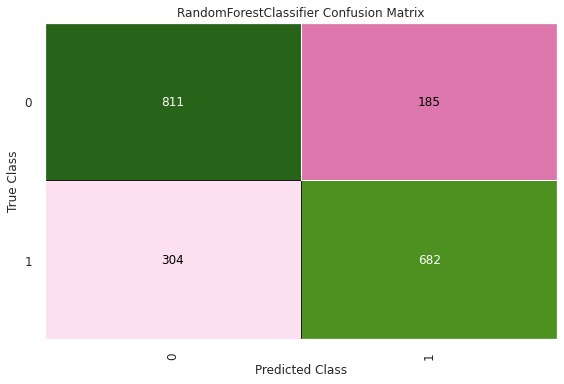

In [ ]:
visualizer = ConfusionMatrix(rand_for, support = True, color_bar = True, cmap = rnd.choice(colors))
visualizer.fit(X_train, y_train)        
visualizer.score(X_test, y_test)   
visualizer.show()  

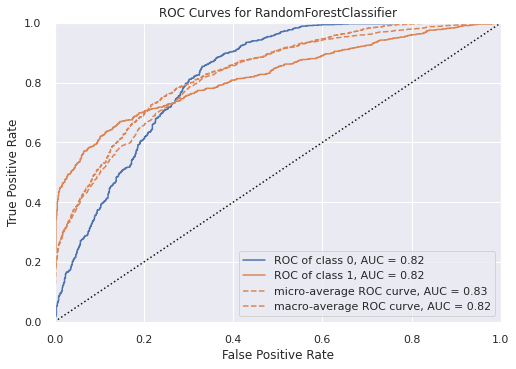

In [ ]:
visualizer = ROCAUC(rand_for, support = True, color_bar = True, cmap = rnd.choice(colors))
visualizer.fit(X_train, y_train)        
visualizer.score(X_test, y_test)   
visualizer.show()  

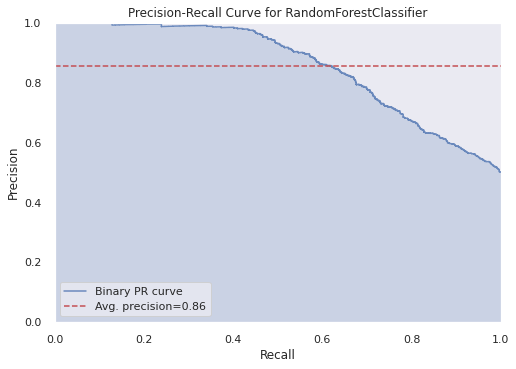

In [ ]:
visualizer = PrecisionRecallCurve(rand_for, support = True, color_bar = True, cmap = rnd.choice(colors))
visualizer.fit(X_train, y_train)        
visualizer.score(X_test, y_test)   
visualizer.show()  

# K-Nearest Neighbors

In [ ]:
#Created an obj for K - Nearest Neighbors
knc = KNeighborsClassifier(n_jobs = -1, n_neighbors = 6)
knc.fit(X_train, y_train)

KNeighborsClassifier(n_jobs=-1, n_neighbors=6)

In [ ]:
#Training Accuracy
knc.score(X_train, y_train)

0.7833044982698962

In [ ]:
#Evalution of Model
y_pred = knc.predict(X_test)
accuracy_score(y_test, y_pred) 

0.7421796165489405

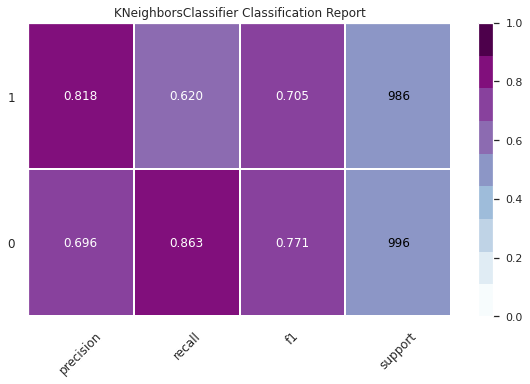

In [ ]:
visualizer = ClassificationReport(knc, support = True, color_bar = True, cmap = rnd.choice(colors))
visualizer.fit(X_train, y_train)        
visualizer.score(X_test, y_test)   
visualizer.show()  

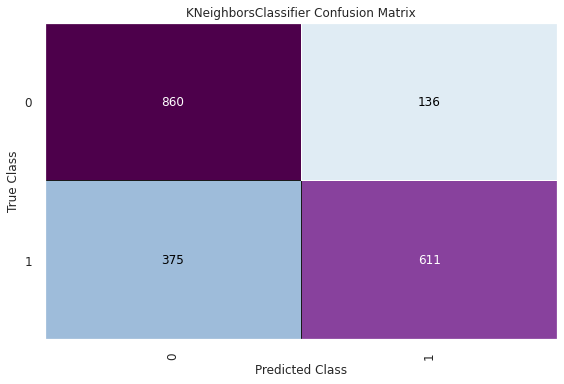

In [ ]:
visualizer = ConfusionMatrix(knc, support = True, color_bar = True, cmap = rnd.choice(colors))
visualizer.fit(X_train, y_train)        
visualizer.score(X_test, y_test)   
visualizer.show()  

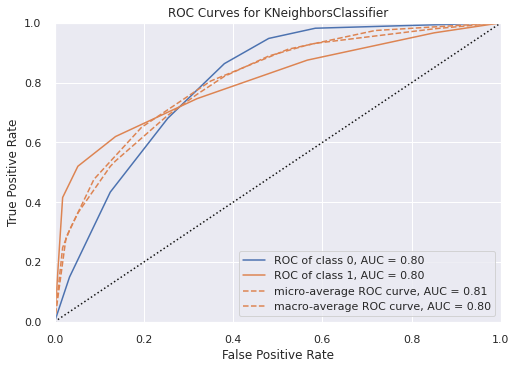

In [ ]:
visualizer = ROCAUC(knc, support = True, color_bar = True, cmap = rnd.choice(colors))
visualizer.fit(X_train, y_train)        
visualizer.score(X_test, y_test)   
visualizer.show()  

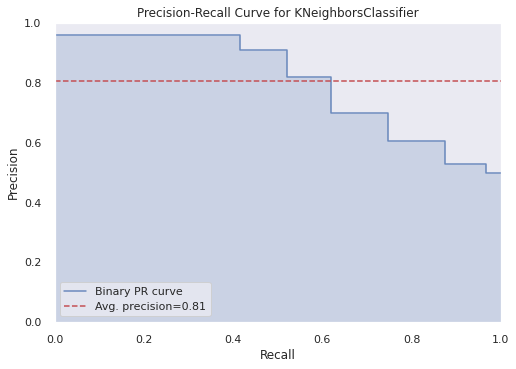

In [ ]:
visualizer = PrecisionRecallCurve(knc, support = True, color_bar = True, cmap = rnd.choice(colors))
visualizer.fit(X_train, y_train)        
visualizer.score(X_test, y_test)   
visualizer.show()  

# Support Vector Machine

In [ ]:
#Created an obj for SVM
svm = SVC(C = 0.25, kernel = 'linear', random_state = 10)
svm.fit(X_train, y_train)

SVC(C=0.25, kernel='linear', random_state=10)

In [ ]:
#Training Accuracy
svm.score(X_train, y_train)

0.715181660899654

In [ ]:
#Evalution of Model
y_pred = svm.predict(X_test)
accuracy_score(y_test, y_pred) 

0.7315842583249244

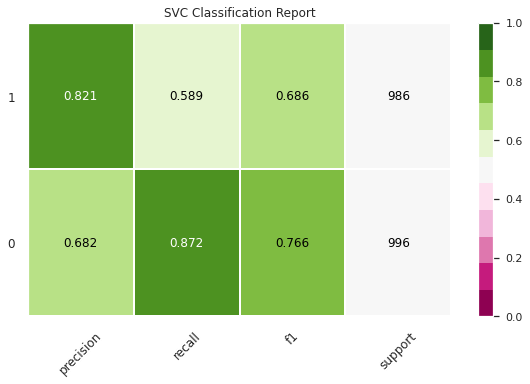

In [ ]:
visualizer = ClassificationReport(svm, support = True, color_bar = True, cmap = rnd.choice(colors))
visualizer.fit(X_train, y_train)        
visualizer.score(X_test, y_test)   
visualizer.show()  

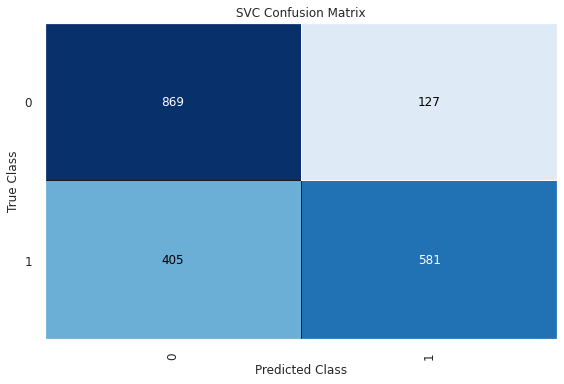

In [ ]:
visualizer = ConfusionMatrix(svm, support = True, color_bar = True, cmap = rnd.choice(colors))
visualizer.fit(X_train, y_train)        
visualizer.score(X_test, y_test)   
visualizer.show()  

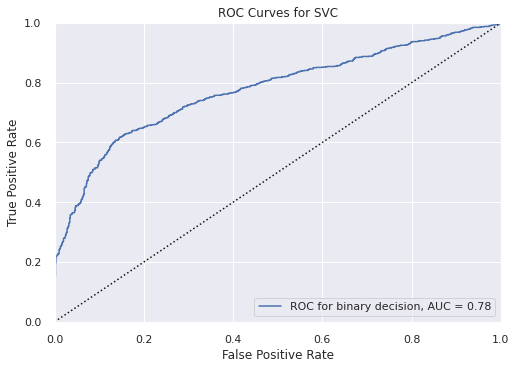

In [ ]:
visualizer = ROCAUC(svm, support = True, color_bar = True, cmap = rnd.choice(colors), binary = True)
visualizer.fit(X_train, y_train)        
visualizer.score(X_test, y_test)   
visualizer.show()  

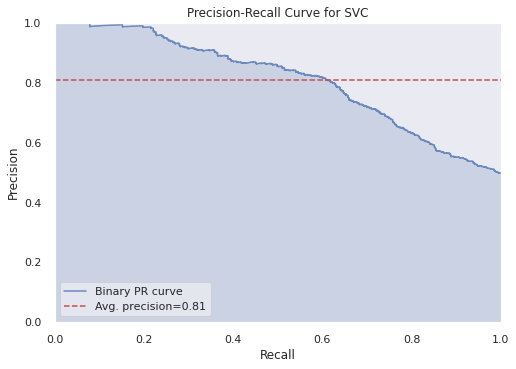

In [ ]:
visualizer = PrecisionRecallCurve(svm, support = True, color_bar = True, cmap = rnd.choice(colors))
visualizer.fit(X_train, y_train)        
visualizer.score(X_test, y_test)   
visualizer.show()  

# Stochastic Gradient Descent

In [ ]:
#Created an obj for SGD
sgd = SGDClassifier(loss = 'modified_huber', max_iter = 2000, shuffle = False, n_jobs = None, early_stopping = False, random_state = 10)
sgd.fit(X_train, y_train)

SGDClassifier(loss='modified_huber', max_iter=2000, random_state=10,
              shuffle=False)

In [ ]:
#Training Accuracy
sgd.score(X_train, y_train)

0.6773356401384083

In [ ]:
#Evalution of Model
y_pred = sgd.predict(X_test)
accuracy_score(y_test, y_pred)

0.6922300706357215

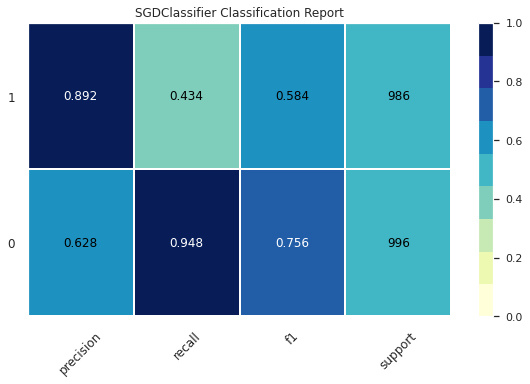

In [ ]:
visualizer = ClassificationReport(sgd, support = True, color_bar = True, cmap = rnd.choice(colors))
visualizer.fit(X_train, y_train)        
visualizer.score(X_test, y_test)   
visualizer.show()  

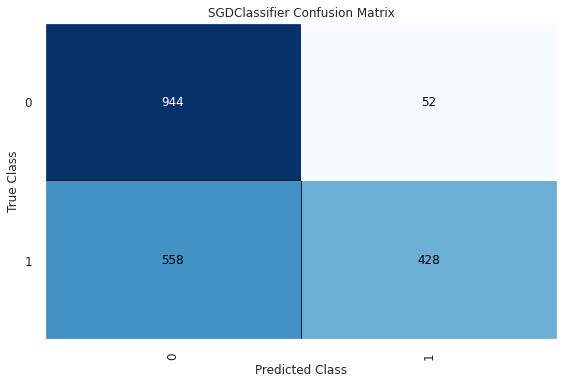

In [ ]:
visualizer = ConfusionMatrix(sgd, support = True, color_bar = True, cmap = rnd.choice(colors))
visualizer.fit(X_train, y_train)        
visualizer.score(X_test, y_test)   
visualizer.show()  

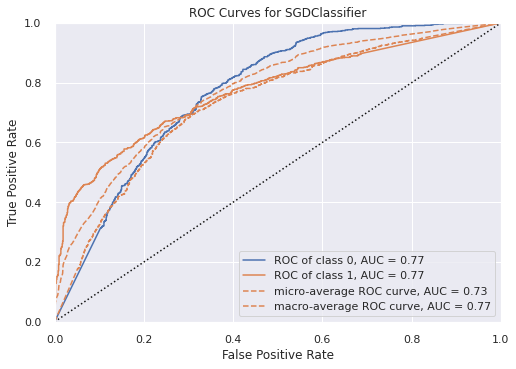

In [ ]:
visualizer = ROCAUC(sgd, support = True, color_bar = True, cmap = rnd.choice(colors))
visualizer.fit(X_train, y_train)        
visualizer.score(X_test, y_test)   
visualizer.show()  

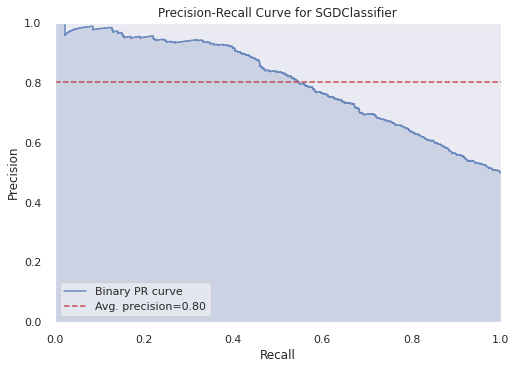

In [ ]:
visualizer = PrecisionRecallCurve(sgd, support = True, color_bar = True, cmap = rnd.choice(colors))
visualizer.fit(X_train, y_train)        
visualizer.score(X_test, y_test)   
visualizer.show()  

# Ada Boost

In [ ]:
#Created an obj for Ada Boost
adab = AdaBoostClassifier(n_estimators = 200, learning_rate = 0.1 , random_state = 10)
adab.fit(X_train, y_train)

AdaBoostClassifier(learning_rate=0.1, n_estimators=200, random_state=10)

In [ ]:
#Training Accuracy
adab.score(X_train, y_train)

0.7326989619377162

In [ ]:
#Evalution of Model
y_pred = adab.predict(X_test)
accuracy_score(y_test, y_pred)

0.7447023208879919

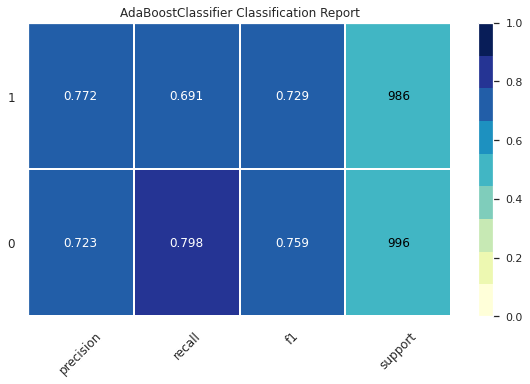

In [ ]:
visualizer = ClassificationReport(adab, support = True, color_bar = True, cmap = rnd.choice(colors))
visualizer.fit(X_train, y_train)        
visualizer.score(X_test, y_test)   
visualizer.show() 

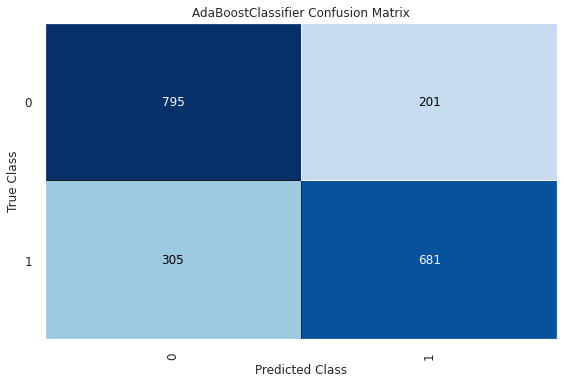

In [ ]:
visualizer = ConfusionMatrix(adab, support = True, color_bar = True, cmap = rnd.choice(colors))
visualizer.fit(X_train, y_train)        
visualizer.score(X_test, y_test)   
visualizer.show() 

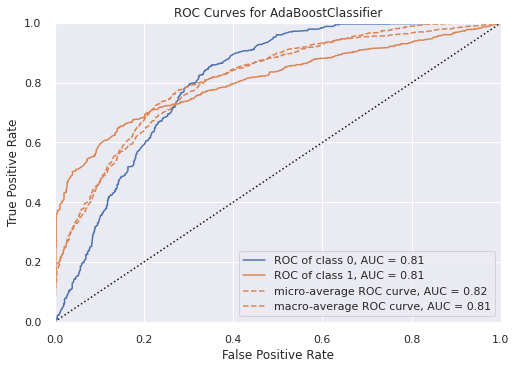

In [ ]:
visualizer = ROCAUC(adab, support = True, color_bar = True, cmap = rnd.choice(colors))
visualizer.fit(X_train, y_train)        
visualizer.score(X_test, y_test)   
visualizer.show() 

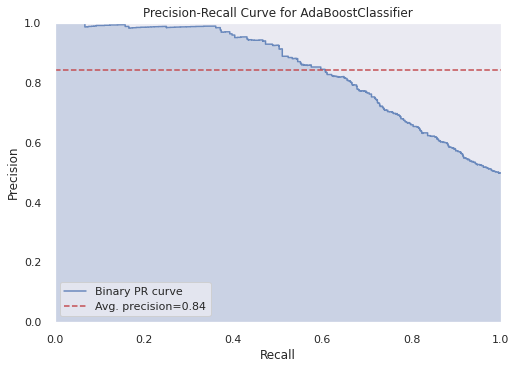

In [ ]:
visualizer = PrecisionRecallCurve(adab, support = True, color_bar = True, cmap = rnd.choice(colors))
visualizer.fit(X_train, y_train)        
visualizer.score(X_test, y_test)   
visualizer.show() 

# Extreme Gradient Boosting

In [ ]:
#Created an obj for Extreme Gradient Boosting
xgb = XGBClassifier(tree_method = 'gpu_hist', n_estimators = 200, learning_rate = 0.1 , random_state = 10)
xgb.fit(X_train, y_train)

XGBClassifier(n_estimators=200, random_state=10, tree_method='gpu_hist')

In [ ]:
#Training Accuracy
xgb.score(X_train, y_train)

0.78719723183391

In [ ]:
#Evalution of Model
y_pred = xgb.predict(X_test)
accuracy_score(y_test, y_pred)

0.7598385469223007

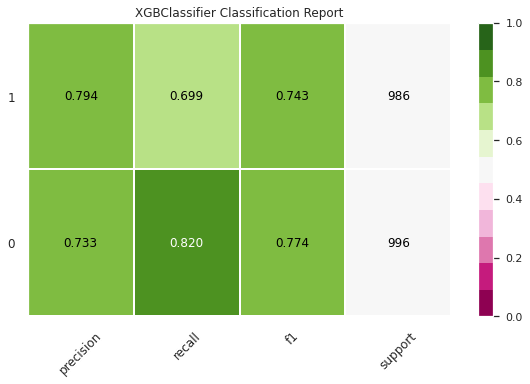

In [ ]:
visualizer = ClassificationReport(xgb, support = True, color_bar = True, cmap = rnd.choice(colors))
visualizer.fit(X_train, y_train)        
visualizer.score(X_test, y_test)   
visualizer.show() 

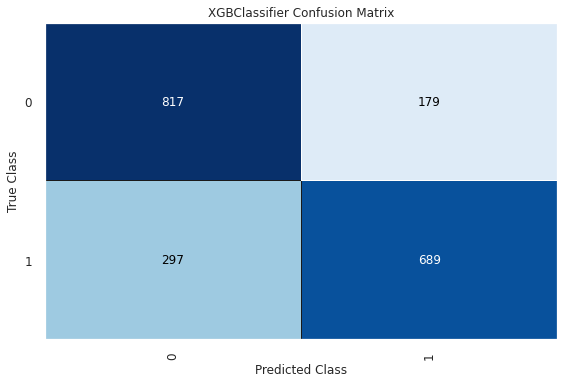

In [ ]:
visualizer = ConfusionMatrix(xgb, support = True, color_bar = True, cmap = rnd.choice(colors))
visualizer.fit(X_train, y_train)        
visualizer.score(X_test, y_test)   
visualizer.show() 

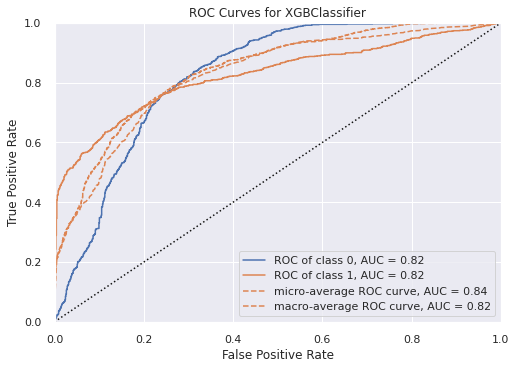

In [ ]:
visualizer = ROCAUC(xgb, support = True, color_bar = True, cmap = rnd.choice(colors))
visualizer.fit(X_train, y_train)        
visualizer.score(X_test, y_test)   
visualizer.show() 

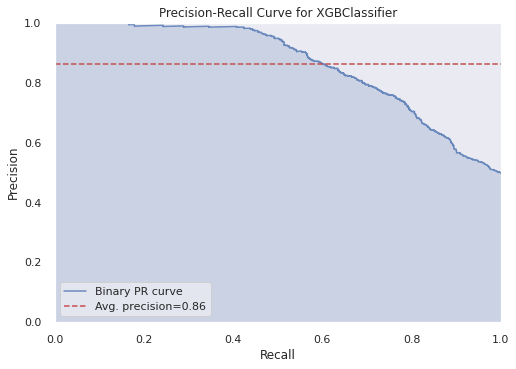

In [ ]:
visualizer = PrecisionRecallCurve(xgb, support = True, color_bar = True, cmap = rnd.choice(colors))
visualizer.fit(X_train, y_train)        
visualizer.score(X_test, y_test)   
visualizer.show() 

# Light Gradient Boosting Machine

In [ ]:
#Created an obj for Light Gradient Boosting Machine
lgbm = LGBMClassifier(n_estimators = 200, num_leaves = 255, objective = 'binary', num_iterations = 1000, n_jobs = -1, max_depth = 5, random_state = 10)
lgbm.fit(X_train, y_train)

LGBMClassifier(max_depth=5, n_estimators=200, num_iterations=1000,
               num_leaves=255, objective='binary', random_state=10)

In [ ]:
#Training Accuracy
lgbm.score(X_train, y_train)

0.9565311418685121

In [ ]:
#Evalution of Model
y_pred = lgbm.predict(X_test)
accuracy_score(y_test, y_pred)

0.7351160443995963

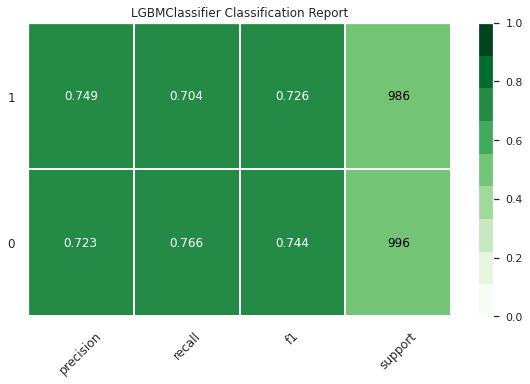

In [ ]:
visualizer = ClassificationReport(lgbm, support = True, color_bar = True, cmap = rnd.choice(colors))
visualizer.fit(X_train, y_train)        
visualizer.score(X_test, y_test)   
visualizer.show() 

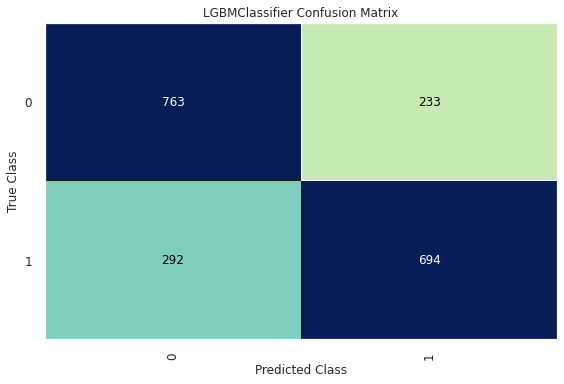

In [ ]:
visualizer = ConfusionMatrix(lgbm, support = True, color_bar = True, cmap = rnd.choice(colors))
visualizer.fit(X_train, y_train)        
visualizer.score(X_test, y_test)   
visualizer.show() 

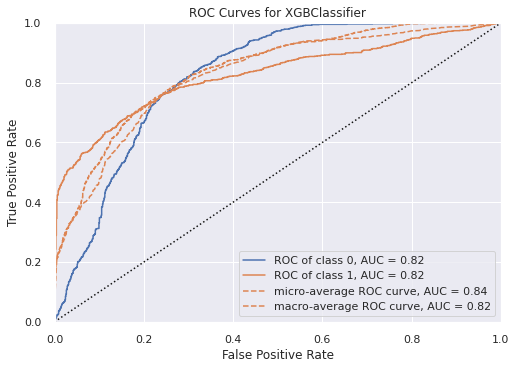

In [ ]:
visualizer = ROCAUC(xgb, support = True, color_bar = True, cmap = rnd.choice(colors))
visualizer.fit(X_train, y_train)        
visualizer.score(X_test, y_test)   
visualizer.show() 

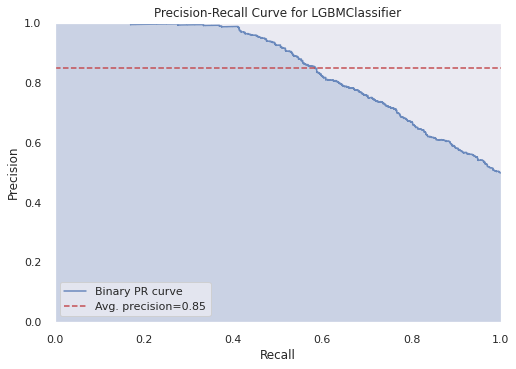

In [ ]:
visualizer = PrecisionRecallCurve(lgbm, support = True, color_bar = True, cmap = rnd.choice(colors))
visualizer.fit(X_train, y_train)        
visualizer.score(X_test, y_test)   
visualizer.show() 

# CatBoost

In [ ]:
#Created an obj for Cat Boost
cat = CatBoostClassifier(task_type = "GPU", iterations = 1000, loss_function = 'Logloss', eval_metric ='Accuracy', random_state = 10, early_stopping_rounds = 100, od_type = "Iter")
cat.fit(X_train, y_train, early_stopping_rounds = 100)

Learning rate set to 0.030988
0:	learn: 0.7337803	total: 133ms	remaining: 2m 12s
1:	learn: 0.7335640	total: 222ms	remaining: 1m 51s
2:	learn: 0.7326990	total: 273ms	remaining: 1m 30s
3:	learn: 0.7326990	total: 383ms	remaining: 1m 35s
4:	learn: 0.7322664	total: 504ms	remaining: 1m 40s
5:	learn: 0.7320502	total: 620ms	remaining: 1m 42s
6:	learn: 0.7368080	total: 704ms	remaining: 1m 39s
7:	learn: 0.7376730	total: 827ms	remaining: 1m 42s
8:	learn: 0.7363754	total: 948ms	remaining: 1m 44s
9:	learn: 0.7350779	total: 1.08s	remaining: 1m 46s
10:	learn: 0.7385381	total: 1.21s	remaining: 1m 48s
11:	learn: 0.7385381	total: 1.35s	remaining: 1m 51s
12:	learn: 0.7409170	total: 1.49s	remaining: 1m 53s
13:	learn: 0.7409170	total: 1.63s	remaining: 1m 54s
14:	learn: 0.7387543	total: 1.67s	remaining: 1m 49s
15:	learn: 0.7417820	total: 1.79s	remaining: 1m 50s
16:	learn: 0.7385381	total: 1.91s	remaining: 1m 50s
17:	learn: 0.7389706	total: 2.05s	remaining: 1m 51s
18:	learn: 0.7398356	total: 2.21s	remaining:

In [ ]:
#Training Accuracy
cat.score(X_train, y_train)

0.7863321799307958

In [ ]:
#Evalution of Model
y_pred = cat.predict(X_test)
accuracy_score(y_test, y_pred)

0.7759838546922301

In [ ]:
cat = wrap(cat)

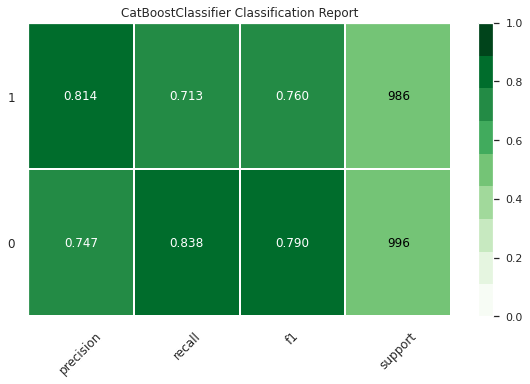

In [ ]:
visualizer = ClassificationReport(cat, support = True, color_bar = True, cmap = rnd.choice(colors))
visualizer.fit(X_train, y_train)        
visualizer.score(X_test, y_test)   
visualizer.show()

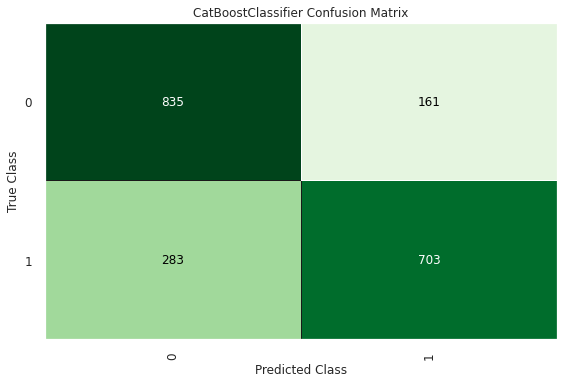

In [ ]:
visualizer = ConfusionMatrix(cat, support = True, color_bar = True, cmap = rnd.choice(colors))
visualizer.fit(X_train, y_train)        
visualizer.score(X_test, y_test)   
visualizer.show()

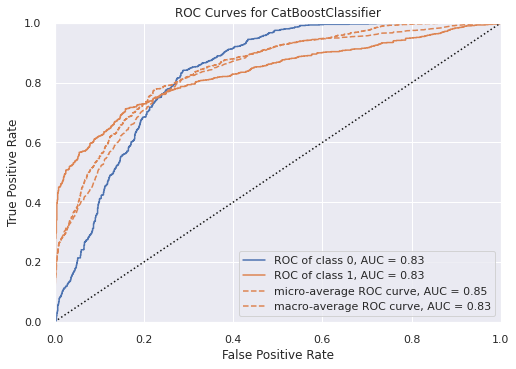

In [ ]:
visualizer = ROCAUC(cat, support = True, color_bar = True, cmap = rnd.choice(colors))
visualizer.fit(X_train, y_train)        
visualizer.score(X_test, y_test)   
visualizer.show()

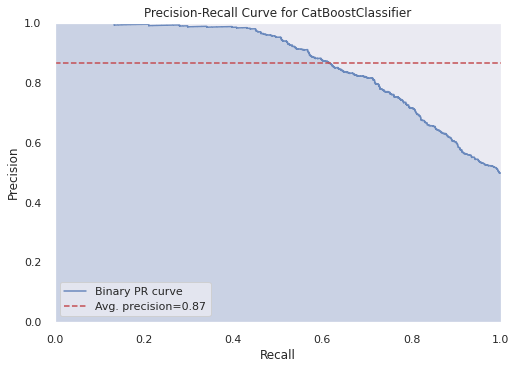

In [ ]:
visualizer = PrecisionRecallCurve(cat, support = True, color_bar = True, cmap = rnd.choice(colors))
visualizer.fit(X_train, y_train)        
visualizer.score(X_test, y_test)   
visualizer.show()